In [24]:
"""
Author : Vageesh Saxena
Date : 22nd of May, 2018
Time : 00:42
Version: 1.0
Description : Regression for Stock Market
"""

'\nAuthor : Vageesh Saxena\nDate : 22nd of May, 2018\nTime : 00:42\nVersion: 1.0\nDescription : Regression for Stock Market\n'

# Intalling the dependencies

In [ ]:
! pip install pandas
! pip install quandl
! pip install numpy
! pip install sklearn
! pip intall matplotlib

# Importing libraries

In [49]:
import pandas as pd
import numpy as np
import quandl
import math
from sklearn import preprocessing,cross_validation
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import pickle
import warnings
warnings.filterwarnings('ignore')

# Creating the dataset

In [50]:
df = quandl.get("WIKI/GOOGL")

# Pre-processing the dataset

In [51]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
# Filling N/A values with -99999 for mathematical calculation sake 
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

# Getting the labels and features

In [52]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])

# Training the model with a test size of 20 percent

In [53]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

# Checking the accuracy of the model

In [54]:
# n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer.
clf = LinearRegression(n_jobs=-1)
# Fitting the training data and checking it cagainst the testing data
clf.fit(X_train, y_train)

# Pickling the classifier for future use
with open('linear_regression.pickle','wb') as f:
    pickle.dump(clf,f)
    
# Reading the pickled classifier
pickle_in = open('linear_regression.pickle','rb')
clf = pickle.load(pickle_in)

confidence = clf.score(X_test, y_test)
print("Accuracy of the linear regression model:",confidence*100,"%")

Accuracy of the linear regression model: 97.79080661526997 %


# Predicting the forecast

In [55]:
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

# Manipulating datetime

In [56]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

# Plotting the prediction

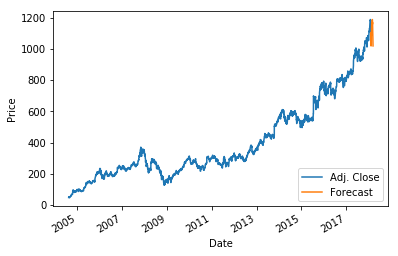

In [57]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()